# AI - CA0 - Mohamad Taha Fakharian

## Goal

In this assignment, we're going to predict some values in a column of dataframe using  statistical analysis.

## Overall Approach

To do this, first we get familiar with the data provided for us using Pandas. We will see some general information about this dataframe and after that, we'll split records to complete and incomplete dataframes, using the values of final columns(NaN or not). We then try to predict the incomplete dataframe using statistical analysis and information from complete dataframe.

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading data
We'll use a dataset for bank term deposit. We'll read the dataset to a dataframe:

In [2]:
bank = pd.read_csv("bank_term_deposit.csv")

# Examining data
Now we use some methods to get some genral information from the dataframe we've read.

In [3]:
bank.describe()

,age,balance,duration,campaign,pdays
count,3984.000000,4164.000000,4388.000000,4521.000000,4521.000000
mean,41.617470,1136.750240,264.724020,2.793630,39.766645
std,10.696378,2726.204918,261.057119,3.109807,100.121124
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000
25%,32.000000,58.000000,104.000000,1.000000,-1.000000
50%,40.000000,316.000000,185.500000,2.000000,-1.000000
75%,49.000000,997.000000,331.000000,3.000000,-1.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000


As you can see above, by using "describe" we can see count, mean, std(standard deviation), min and max and some other descriptive statistics for numerical columns in the dataframe.

In [4]:
bank.tail()

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
4516,33.0,services,married,secondary,-333.0,yes,no,329.0,5,-1,unknown,no
4517,57.0,self-employed,married,tertiary,-3313.0,yes,yes,153.0,1,-1,unknown,no
4518,57.0,technician,married,secondary,295.0,no,no,151.0,11,-1,unknown,no
4519,28.0,blue-collar,married,secondary,1137.0,no,no,129.0,4,211,other,no
4520,44.0,entrepreneur,single,tertiary,1136.0,yes,yes,345.0,2,249,other,no


As you can see above, by using "tail" we can see last rows of the dataframe, which is by default 5 rows.

In [5]:
bank.head()

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.0,unemployed,married,primary,1787.0,no,no,79.0,1,-1,unknown,no
1,33.0,services,married,secondary,4789.0,yes,yes,NaN,1,339,failure,no
2,NaN,management,single,tertiary,135.0,yes,no,185.0,1,330,failure,no
3,30.0,management,married,tertiary,1476.0,yes,yes,199.0,4,-1,unknown,no
4,59.0,blue-collar,married,secondary,NaN,yes,no,226.0,1,-1,unknown,no


As you can see above, by using "head" we can see first rows of the dataframe, which is by default 5 rows.

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        3984 non-null   float64
 1   job        4521 non-null   object 
 2   marital    4401 non-null   object 
 3   education  4521 non-null   object 
 4   balance    4164 non-null   float64
 5   housing    4302 non-null   object 
 6   loan       4521 non-null   object 
 7   duration   4388 non-null   float64
 8   campaign   4521 non-null   int64  
 9   pdays      4521 non-null   int64  
 10  poutcome   4521 non-null   object 
 11  y          4087 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 424.0+ KB


As you can see above, by using "info" we can get a good summary of the dataframe, which is column names, indexes, dtypes and Non-null values and memory usage of the dataframe.

# Using info method
According to the last cell, we have 5 numerical columns and 7 categorical columns. We can use label encoding to tranform a categorical column to a numerical one. We'll use this approach for "marital" column: 

In [7]:
transform = {
    'divorced' : 0,
    'single' : 1,
    'married' : 2
}
bank_changed = bank.replace(transform)
bank_changed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        3984 non-null   float64
 1   job        4521 non-null   object 
 2   marital    4401 non-null   float64
 3   education  4521 non-null   object 
 4   balance    4164 non-null   float64
 5   housing    4302 non-null   object 
 6   loan       4521 non-null   object 
 7   duration   4388 non-null   float64
 8   campaign   4521 non-null   int64  
 9   pdays      4521 non-null   int64  
 10  poutcome   4521 non-null   object 
 11  y          4087 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 424.0+ KB


As you can see, the type of marital column has been changed after this transformation.

# Counting NaNs
To get familiar with missing values in dataframes, we'll count rows that have missing values for each column as follows:

In [8]:
bank.isna().sum()

age          537
job            0
marital      120
education      0
balance      357
housing      219
loan           0
duration     133
campaign       0
pdays          0
poutcome       0
y            434
dtype: int64

Now we'll replace Nan values with mean of column for numerical columns and with mode of column for categorical columns to reduce missing values and get a better sense of the dataframe.

In [9]:
from pandas.api.types import is_numeric_dtype
for i in bank.columns[bank.isnull().any(axis=0)]:
    if is_numeric_dtype(bank[i]):
        bank[i].fillna(bank[i].mean(), inplace=True)
    elif i != 'y':
        bank[i].fillna(bank[i].mode()[0], inplace=True)
bank.isna().sum()

age            0
job            0
marital        0
education      0
balance        0
housing        0
loan           0
duration       0
campaign       0
pdays          0
poutcome       0
y            434
dtype: int64

As you can see, after this replacement, all missing values of all columns are replaced with mean/mode of that column, according to the type of that column. We'll not replave the goal column("y") to predict them later. Note that using mode method, we might have more that one value for mode. So we'll use the first value for this concentration.
If we replace missing values with mean, the mean won't change. It's easy to apply and we can keep track of whole dataset after this replacement. Specifically, if the missing values are at random positions, our estimate from mean remains unbiased too. In contrast, using this replacement will lead to bias in multivariate estimates like correlation. Imagine that missing values are far from current mean of datas. If we replace them with mean, this will cause a bias in variance(less variance as it's expected) and as explained before, more bias in other calculations like correlation. Also this replacement will cause in mean biasing in some situation(where missing values are not at random places and are skewed to a specific range. This replacement will alse skew the data to the mean(and not other places). Same explanation can be written for mode replacement in categorical columns.

Now, we'll exclude the rows that have missing values in goal column and put them in another dataframe and from now on, we'll use information from known rows to predict missing rows.

In [10]:
nan_bank = bank[bank['y'].isnull()]
nan_bank

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
34,49.00000,technician,married,tertiary,1235.0,no,no,354.00000,3,-1,unknown,NaN
38,33.00000,management,married,secondary,3935.0,yes,no,765.00000,1,342,failure,NaN
54,41.61747,blue-collar,married,secondary,2231.0,yes,no,272.00000,3,-1,unknown,NaN
65,51.00000,blue-collar,divorced,secondary,23.0,yes,no,134.00000,1,170,failure,NaN
89,41.61747,blue-collar,married,secondary,1831.0,yes,no,203.00000,2,-1,unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4470,31.00000,technician,single,tertiary,1166.0,yes,no,207.00000,1,-1,unknown,NaN
4471,59.00000,management,married,unknown,3534.0,no,no,216.00000,4,-1,unknown,NaN
4473,33.00000,technician,married,secondary,479.0,yes,no,137.00000,1,272,failure,NaN
4477,32.00000,management,single,tertiary,577.0,no,no,101.00000,2,-1,unknown,NaN


In [11]:
bank = bank[bank['y'].notna()]
bank

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.00000,unemployed,married,primary,1787.00000,no,no,79.00000,1,-1,unknown,no
1,33.00000,services,married,secondary,4789.00000,yes,yes,264.72402,1,339,failure,no
2,41.61747,management,single,tertiary,135.00000,yes,no,185.00000,1,330,failure,no
3,30.00000,management,married,tertiary,1476.00000,yes,yes,199.00000,4,-1,unknown,no
4,59.00000,blue-collar,married,secondary,1136.75024,yes,no,226.00000,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.00000,services,married,secondary,-333.00000,yes,no,329.00000,5,-1,unknown,no
4517,57.00000,self-employed,married,tertiary,-3313.00000,yes,yes,153.00000,1,-1,unknown,no
4518,57.00000,technician,married,secondary,295.00000,no,no,151.00000,11,-1,unknown,no
4519,28.00000,blue-collar,married,secondary,1137.00000,no,no,129.00000,4,211,other,no


# Counting different parameters in dataframe
Now we count values in dataframe. First we count how many people have taken housing loan as follows: 

In [12]:
bank['housing'].value_counts()

yes    2389
no     1698
Name: housing, dtype: int64

Second we count how many people have registered for term deposit as follows:

In [13]:
bank['y'].value_counts()

no     3623
yes     464
Name: y, dtype: int64

Now we count number of people that are older than 35, single and their last poutcome is success:

In [14]:
bank[(bank['age'] > 35) & (bank['marital'] == 'single') & (bank['poutcome'] == 'success')].shape[0]

14

Finally, we'll calculate mean of balance for people whom their education level is secondary. First we'll calculate it by vectorized way:

In [15]:
import time
t0 = time.time()
mean = bank[bank['education'] == 'secondary']['balance'].mean()
t1 = time.time()
print('Calculated mean = {0} in {1} seconds'.format(mean, t1 - t0))

Calculated mean = 950.701723798089 in 0.0019865036010742188 seconds


Now we'll use a for-loop approach to calculate this value:

In [16]:
new_bank = bank[bank['education'] == 'secondary']
t0 = time.time()
balance_sum = 0
count = 0
for index, row in new_bank.iterrows():
    balance_sum += row['balance']
    count += 1
t1 = time.time()
print('Calculated mean = {0} in {1} seconds'.format(balance_sum / count, t1 - t0))

Calculated mean = 950.7017237980879 in 0.07049179077148438 seconds


As you can see, by comparing both approach, we'll see that there is a dramatic increase in running time for non-vectorized version(about 90 times slower than the first one).

# Plotting histograms for different columns
Now, we'll plot histograms for columns to see their distribution:

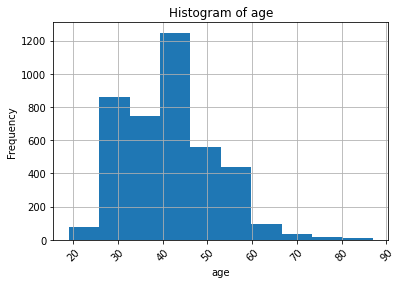

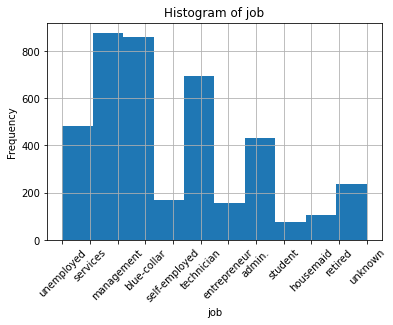

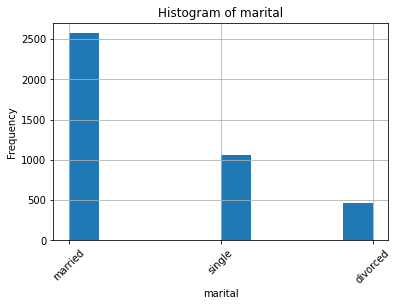

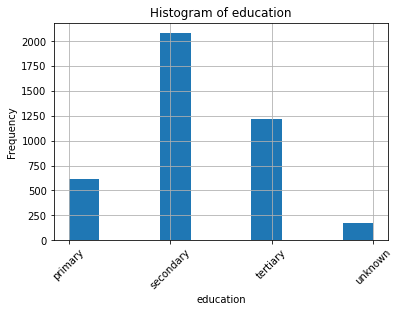

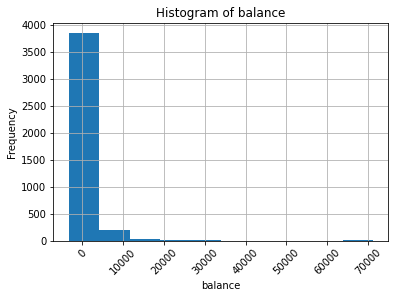

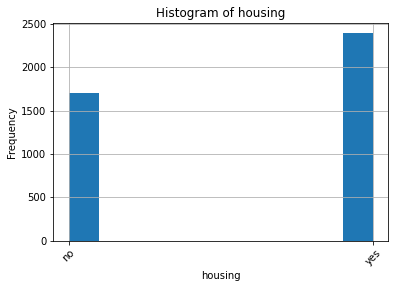

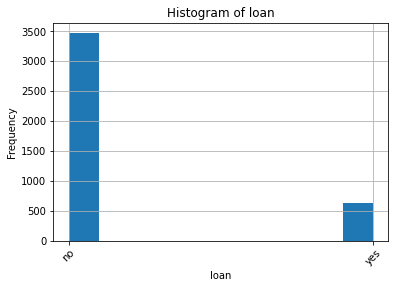

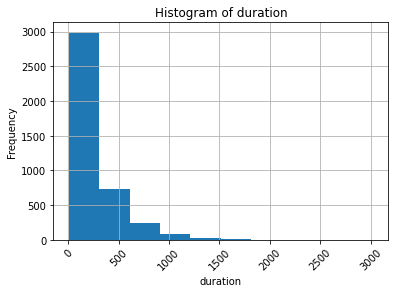

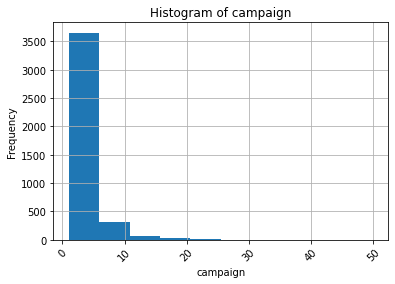

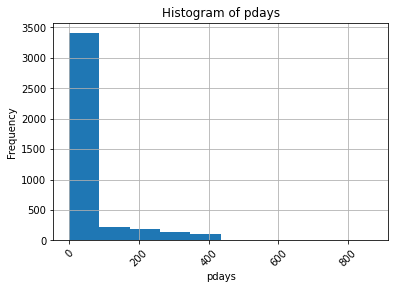

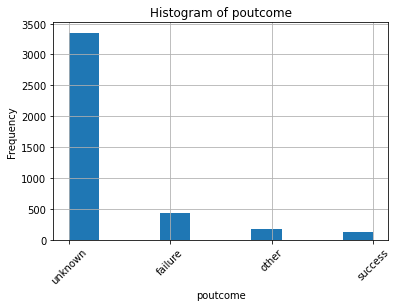

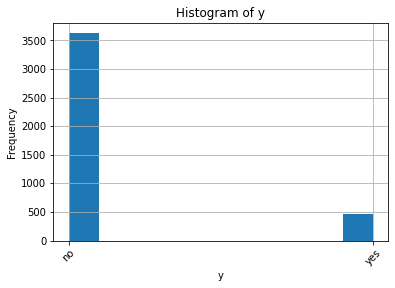

In [17]:
for column in bank:
    plt.figure()
    plt.title('Histogram of {}'.format(column))
    plt.xticks(rotation = 45)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    bank[column].hist()

From now on, we'll only consider numerical columns.

# Normalizing data
Before doing analysis, we'll normalize data to perform better results for our prediction system. We'll do this to prevent the system from getting biased from different scales in different columns. Also this will lead to computation on smaller data, which will prevent from overflow in results. We'll normalize each column by subtracting from mean and dividing by standard deviation of that column. This will make the mean of new data to zero and standard deviation to one.

In [18]:
normalized_bank = bank.copy()
for column in normalized_bank:
    if is_numeric_dtype(normalized_bank[column]):
        normalized_bank[column] = (bank[column] - bank[column].mean())/bank[column].std()

bank = normalized_bank
bank

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,-1.154366,unemployed,married,primary,0.255388,no,no,-0.724620,-0.573012,-0.404051,unknown,no
1,-0.856422,services,married,secondary,1.406374,yes,yes,-0.005131,-0.573012,3.031432,failure,no
2,-0.000582,management,single,tertiary,-0.378000,yes,no,-0.313979,-0.573012,2.940492,failure,no
3,-1.154366,management,married,tertiary,0.136148,yes,yes,-0.259744,0.380660,-0.404051,unknown,no
4,1.725758,blue-collar,married,secondary,0.006078,yes,no,-0.155147,-0.573012,-0.404051,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.856422,services,married,secondary,-0.557434,yes,no,0.243872,0.698550,-0.404051,unknown,no
4517,1.527129,self-employed,married,tertiary,-1.699986,yes,yes,-0.437946,-0.573012,-0.404051,unknown,no
4518,1.527129,technician,married,secondary,-0.316655,no,no,-0.445694,2.605894,-0.404051,unknown,no
4519,-1.352996,blue-collar,married,secondary,0.006173,no,no,-0.530922,0.380660,1.738074,other,no


# Visualizing yes/no normal distribution for each feature
Now it's prediction time! First we seperate rows from yes/no in target column:

In [19]:
yes = bank[bank["y"] == "yes"]
no = bank[bank["y"] == "no"]

In [20]:
# library for generating normal distribution
from scipy.stats import norm

Now we calculate mean and standard deviation for each numerical column for both of our yes/no rows. After that, we get pdfs of normal distribution with the paramteres calculated and plot both curves(normal distribution) in one plot to see how they're seperated from each other and whether it's good to use them as prediction feature for our missing dataframe. We use normal distribution for our estimation because most of distribution in nature(like bank records, etc) are based on normal distribution. You can see the plots as follows:

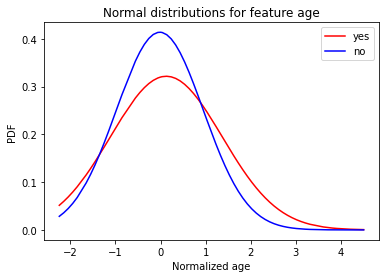

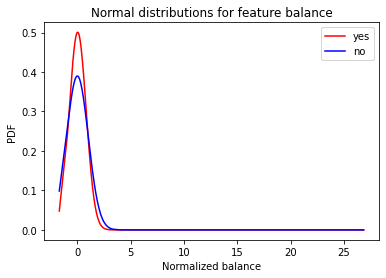

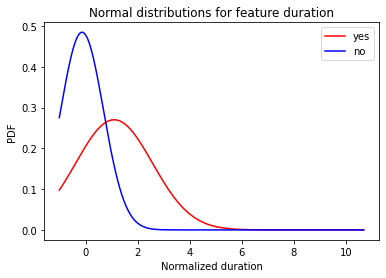

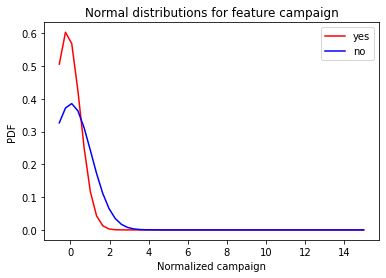

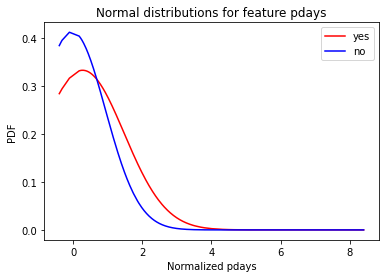

In [21]:
details = {}
for feature in bank:
    if is_numeric_dtype(bank[feature]):
        feature_yes_mean = yes[feature].mean()
        feature_yes_std = yes[feature].std()
        feature_no_mean = no[feature].mean()
        feature_no_std = no[feature].std()
        yes_pdfs = norm(feature_yes_mean, feature_yes_std).pdf(bank[feature].sort_values())
        no_pdfs = norm(feature_no_mean, feature_no_std).pdf(bank[feature].sort_values())
        details[feature] = [yes_pdfs, no_pdfs]
        plt.figure()
        plt.xlabel("Normalized " + feature)
        plt.ylabel('PDF')
        plt.plot(bank[feature].sort_values(), yes_pdfs, color = 'r', label = 'yes')
        plt.plot(bank[feature].sort_values(), no_pdfs, color = 'b', label = 'no')
        plt.legend()
        plt.title("Normal distributions for feature {}".format(feature))
        plt.show()

As you can see, duration is best feature to predict the missing targets from them. It's because only in this feature we can see that curves for both lables can be seperated better. It means that for duration values less than intersection of curves, we can label that record as a no with a good confident and for values more than this point, we can label them as a yes. In other plots, curves are mixed with each other and this scenario can't be applied to them, as this will result in low accuracy in estimation. So we will use this feature for prediction.

Our next job is to find the intersection of these two curves. We'll use "shapely" library for this purpose as follows:

In [22]:
from shapely.geometry import LineString
yes_string = LineString(np.column_stack((bank["duration"].sort_values(), details["duration"][0])))
no_string = LineString(np.column_stack((bank["duration"].sort_values(), details["duration"][1])))
intersection = yes_string.intersection(no_string)

feature, p = intersection.xy
feature[0]

0.7681346965513338

# Prediction for missing target values
It's final stage! We'll normalize duration column values for rows with missing target values and predict their targets based on their normalized duration value: if it's less than intersection calculated above, we'll label them as no. Otherwise, we'll label them as yes.
Pay attention! None of duration values is Nan, because we have replaced NaNs with mean of each column. The prediction is based on the plot that is provided above:

In [23]:
normalized_bank = nan_bank.copy()
normalized_bank["duration"] = (nan_bank["duration"] - nan_bank["duration"].mean())/nan_bank["duration"].std()

normalized_bank.loc[normalized_bank.duration > feature[0], 'y'] = "yes"
normalized_bank.loc[normalized_bank.duration <= feature[0], 'y'] = "no"
normalized_bank['y'].value_counts()

no     375
yes     59
Name: y, dtype: int64

Finally, we'll save our prediction with original indexes in a new csv file:

In [24]:
normalized_bank.to_csv("predicted_results.csv")

# Conclusion

We've used a simple statistical analysis to predict missing target values in a bank term deposit dataset. First we normalized our numerical features and splitted rows to yes/no sets and calculated mean and std for each feature and for each set. Then by analyzing plots, we decided to choose duration feature for prediction. It's because this feature could split labels with more confident and finally we predicted the missing labels using this feature. It can be a good approach for a simple machine learning system if there is feature among all features that could split dataset quite well. We should pay attention that it's a simple model and for more complex datasets, we can't get a good accuracy by applying this approach, since we're just predict based on one feature and not all of them.